# Classification Demo

## Flower species prediction

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('iris.csv')

In [6]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
from sklearn.preprocessing import LabelEncoder

df['species'] = LabelEncoder().fit_transform(df['species'])

In [12]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

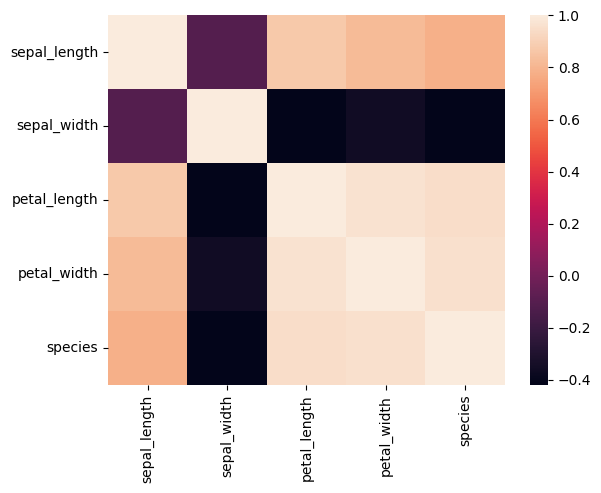

In [14]:
sns.heatmap(df.corr())

In [15]:
x = df.drop('species', axis = 1)
y = df['species']

In [92]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=123456)

In [93]:
from sklearn.linear_model import LogisticRegressionCV

def create_logostic_regression_model():

    model = LogisticRegressionCV(max_iter=1000)

    model.fit(x_train,y_train)

    return model
    

In [94]:
from sklearn.neighbors import KNeighborsClassifier

def create_knn_model():

    model = KNeighborsClassifier()

    model.fit(x_train,y_train)

    return model

In [95]:
from sklearn.svm import SVC

def create_svm_model():

    model = SVC(C=2,kernel='rbf')

    model.fit(x_train,y_train)

    return model

In [96]:
from sklearn.naive_bayes import GaussianNB

def create_naive_bayes_model():

    model = GaussianNB()

    model.fit(x_train,y_train)

    return model

In [97]:
from sklearn.tree import DecisionTreeClassifier

def create_decision_tree_model():

    model = DecisionTreeClassifier()

    model.fit(x_train,y_train)

    return model

In [98]:
from sklearn.ensemble import RandomForestClassifier
def create_random_forest_model():
    
    model = RandomForestClassifier(max_depth= 10, n_estimators= 70)

    model.fit(x_train,y_train)
    
    return model

In [99]:
from xgboost import XGBClassifier

def create_xgboost_model():

    model = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

    model.fit(x_train,y_train)

    return model
    

In [100]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model):
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average = 'weighted')
    recall = recall_score(y_test,y_pred,average = 'weighted')
    f1 = f1_score(y_test,y_pred,average = 'weighted')

    return f"{accuracy:.2f}", f"{precision:.2f}", f"{recall:.2f}", f"{f1:.2f}"

In [101]:
models = []

models.append({"name":"Logistic Regression model","model": create_logostic_regression_model()})
models.append({"name":"KNN","model": create_decision_tree_model()})
models.append({"name":"SVM","model": create_svm_model()})
models.append({"name":"Naive Bayes","model": create_naive_bayes_model()})
models.append({"name":"Decision tree","model": create_decision_tree_model()})
models.append({"name":"Random Forest","model": create_random_forest_model()})
models.append({"name":"XGB","model": create_xgboost_model()})

In [102]:
# get the models evaluated

for model_info in models:
    accuracy,precision,recall,f1 = evaluate_model(model_info['model'])

    model_info['accuracy'] = accuracy
    model_info['precision'] = precision
    model_info['recall'] = recall
    model_info['f1'] = f1

In [103]:
evaluation_df = pd.DataFrame(models,columns = ["name","accuracy","precision","recall","f1"])
evaluation_df

,name,accuracy,precision,recall,f1
0,Logistic Regression model,1.00,1.00,1.00,1.00
1,KNN,1.00,1.00,1.00,1.00
2,SVM,1.00,1.00,1.00,1.00
3,Naive Bayes,1.00,1.00,1.00,1.00
4,Decision tree,1.00,1.00,1.00,1.00
5,Random Forest,1.00,1.00,1.00,1.00
6,XGB,1.00,1.00,1.00,1.00
